# ASR Project Progress --- Speech/Language Understanding
This notebook will present some statistics about the dataset that I've put together from various sources as well as compare results from pretrained, fine-tuned, and normally trained models.

The goal of this stage of the project is for the models to achieve a good speech/language understanding of aviation english. As you will see from the results in this notebook, models pretrained on conversational english datasets (e.g. LibriSpeech and WSJ) perform very poorly on our data, often reaching error rates between 90% and 110%.

The preliminary imports are below e.g. OS interface packages, pytorch, pretty-print functions, etc.

In [1]:
import glob
import os
import torch
import gc
import json
from pprint import pprint

The following cell contains some sanity checks to make sure the model checkpoints I created are still available/exist, that the GPU on the machine is available, and that the pretrained checkpoints from Nvidia are still available.

In [2]:
# GPU sanity check
print(f"GPU available: {torch.cuda.is_available()}\n")

# get list of model checkpoints
checkpoints = glob.glob(os.path.join("checkpoints", "*.nemo"))
pretrained = [
    "stt_en_jasper10x5dr",
    "QuartzNet15x5Base-En"
]

print("Saved model checkpoints:")
print("------------------------")
pprint(checkpoints)

print("\nPretrained models:")
print("------------------")
pprint(pretrained)
print()

train_manifest_path = "manifests/train_manifest.json"
test_manifest_path = "manifests/test_manifest.json"

train_manifest = []
test_manifest = []

with open(train_manifest_path, "r", encoding="utf-8") as f:
    for line in f.readlines():
        train_manifest.append(json.loads(line))
    print(f"Train data loaded: {len(train_manifest)} samples")

with open(test_manifest_path, "r", encoding="utf-8") as f:
    for line in f.readlines():
        test_manifest.append(json.loads(line))
    print(f"Test data loaded: {len(test_manifest)} samples")

# memory clean-up just in case there was stuff running on the GPU previously
gc.collect()
torch.cuda.empty_cache()

GPU available: True

Saved model checkpoints:
------------------------
['checkpoints/jasper_finetuned.nemo',
 'checkpoints/quartznet_finetuned.nemo',
 'checkpoints/ctc_randominit.nemo']

Pretrained models:
------------------
['stt_en_jasper10x5dr', 'QuartzNet15x5Base-En']

Train data loaded: 25780 samples
Test data loaded: 8056 samples


## Datasets and Statistics
The saved model checkpoints used in this notebook (see `checkpoints` list in code cell above) were trained on the "Air Traffic Control Complete", "Air Traffic Control Simulation (ATCO)", and "Air Traffic Control Simulation 2 (ATCO2)" datasets. The statistics of these datasets can be found in the table below.

Dataset | Samples | Duration (seconds) | Transcript Tokens | Unique Tokens 
------- | ------- | ------------------ | ----------------- | -------------
Air Traffic Control Complete | 29,862 | 92427.37 | 355,484 | 2,210 
Air Traffic Control Simulation | 9,544 | 37622.03 | 107,759 | 824 
Air Traffic Control Simulation 2 | 874 | 7,340.93 | 10,886 | 855 
Total | 40,280 | 137,390.33 | 474,129 | 2,910 

In [3]:
from data import Data

training_set = Data.from_manifest(train_manifest_path)
testing_set = Data.from_manifest(test_manifest_path)

/home/students/vandebra/miniconda3/envs/nemo/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Audio file: /home/students/vandebra/programming/thesis_data/atcosim/wavdata/zf2/zf2_05/zf2_05_159.wav
Transcript: lufthansa four six six five


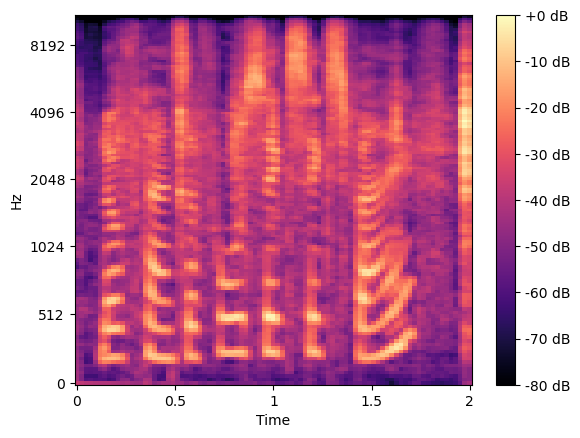

In [8]:
file, transcript = training_set.generate_spec()
print(f"Audio file: {file}\nTranscript: {transcript}")

Audio file: /home/students/vandebra/programming/thesis_data/atc0_comp/atc0_dca/data/audio/dca_lc_1.wav
Transcript: three twenty eight departure seventeen sixty two by


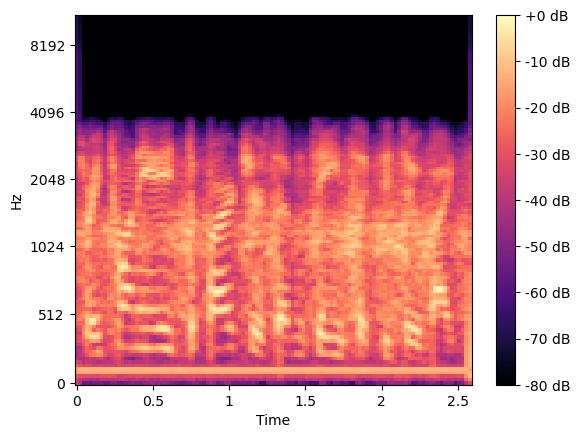

In [11]:
file, transcript = testing_set.generate_spec()
print(f"Audio file: {file}\nTranscript: {transcript}")